Use catalogs from March 7

In [3]:
import sys
# sys.path.append('/Users/mehdi/Dropbox/github/DESILSS')
sys.path.append('/global/homes/m/mehdi/github/DESILSS')

In [4]:
import numpy as np
from syslss import hpixsum
import scipy as sp

In [5]:
import healpy as hp

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
import os
#path = '/Users/mehdi/analyses/eboss/ashley_cats/'
path = '/global/homes/m/mehdi/work/ebossv5_10_7/'
os.listdir(path)

['ELGNGCtestfull.dat.fits',
 'ELGNGCtestfull.ran.fits',
 'ELGSGCtestfull.ran.fits',
 'ELG.v5_10_7.latest.rands.fits',
 'ELGSGCtestfull.dat.fits']

In [17]:
import fitsio as ft

# NGC

In [18]:
def get_hists(label='NGC'):
    galcat = ft.read(path+'ELG'+label+'testfull.dat.fits')
    rancat = ft.read(path+'ELG'+label+'testfull.ran.fits')
    sf = galcat.size / rancat.size
    sysnames = ['galdepth_g','galdepth_r',
            'galdepth_z','ebv',
            'psfsize_g','psfsize_r',
             'psfsize_z','probanymask']
    ranges = [(0, 1500), (0,800), (0, 150),
              (0, 0.14), (0.,4), (0, 4), (0,4),
              (0,1)]
    plt.rc('axes.spines', right=False, top=False)
    plt.rc('font', size=18)
    f,a = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
    a = a.flatten() 
    l = ['galaxy','random']
    c = ['blue', 'grey']
    for i,name in enumerate(sysnames):
        if name != 'probanymask':
            a[i].hist(galcat[name], alpha=0.2, bins=15, range=ranges[i], color=c[0])
        a[i].hist(rancat[name], alpha=0.2, 
                  weights=sf*np.ones(rancat.size), bins=15, range=ranges[i],
                  #weights=sf*(1-rancat['probanymask']), bins=15, range=ranges[i],
                 color=c[1])
        a[i].set_xlabel(name)
        a[i].set_yscale('log')
        if i == 0:
            a[i].text(0.7, 0.98, label, transform=a[i].transAxes)
            a[i].text(0.7, 0.9, l[0], transform=a[i].transAxes, color=c[0])
            a[i].text(0.7, 0.82, l[1], transform=a[i].transAxes, color=c[1])

In [19]:
def get_hists_w(label='NGC'):
    galcat = ft.read(path+'ELG'+label+'testfull.dat.fits')
    rancat = ft.read(path+'ELG'+label+'testfull.ran.fits')
    sf = galcat.size / (1.-rancat['probanymask']).sum()
    sf2 = galcat.size / rancat.size
    sysnames = ['galdepth_g','galdepth_r',
            'galdepth_z','ebv',
            'psfsize_g','psfsize_r',
             'psfsize_z']#,'probanymask']
    ranges = [(0, 1500), (0,800), (0, 150),
              (0, 0.14), (0.,4), (0, 4), (0,4),
              (0,1)]
    plt.rc('axes.spines', right=False, top=False)
    plt.rc('font', size=18)
    f,a = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
    a = a.flatten() 
    l = ['galaxy','random']
    c = ['blue', 'grey']
    for i,name in enumerate(sysnames):
        if name != 'probanymask':
            a[i].hist(galcat[name], alpha=0.2, bins=15, range=ranges[i], color=c[0])
        a[i].hist(rancat[name], alpha=0.2, 
                  weights=sf*(1-rancat['probanymask']), bins=15, range=ranges[i],
                 color='orchid', hatch='/')
        a[i].hist(rancat[name], alpha=0.2, 
          weights=sf2*np.ones(rancat.size), bins=15, range=ranges[i],
          color=c[1])
        a[i].set_xlabel(name)
        a[i].set_yscale('log')
        if i == 0:
            a[i].text(0.5, 0.98, label, transform=a[i].transAxes)
            a[i].text(0.5, 0.9, l[0], transform=a[i].transAxes, color=c[0])
            a[i].text(0.5, 0.82, l[1], transform=a[i].transAxes, color=c[1])
            a[1].text(0.5, 0.95, l[1]+'\n x (1-probanymask)',
                      transform=a[1].transAxes, color='orchid', fontsize=12)

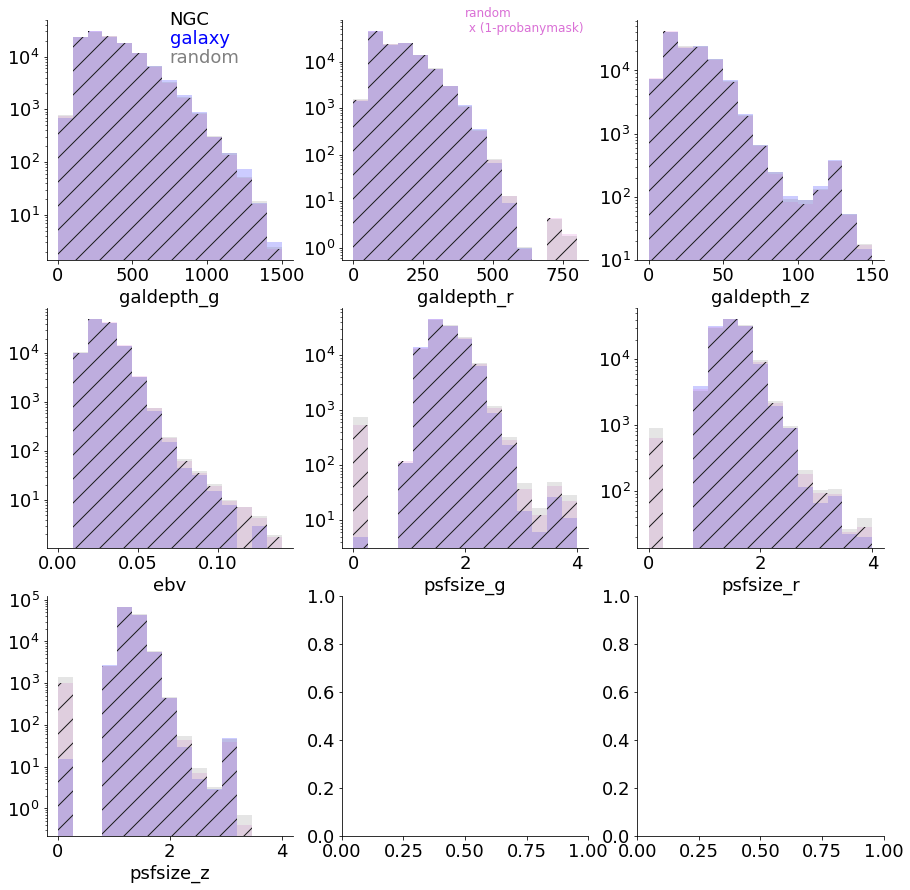

In [20]:
get_hists_w('NGC')

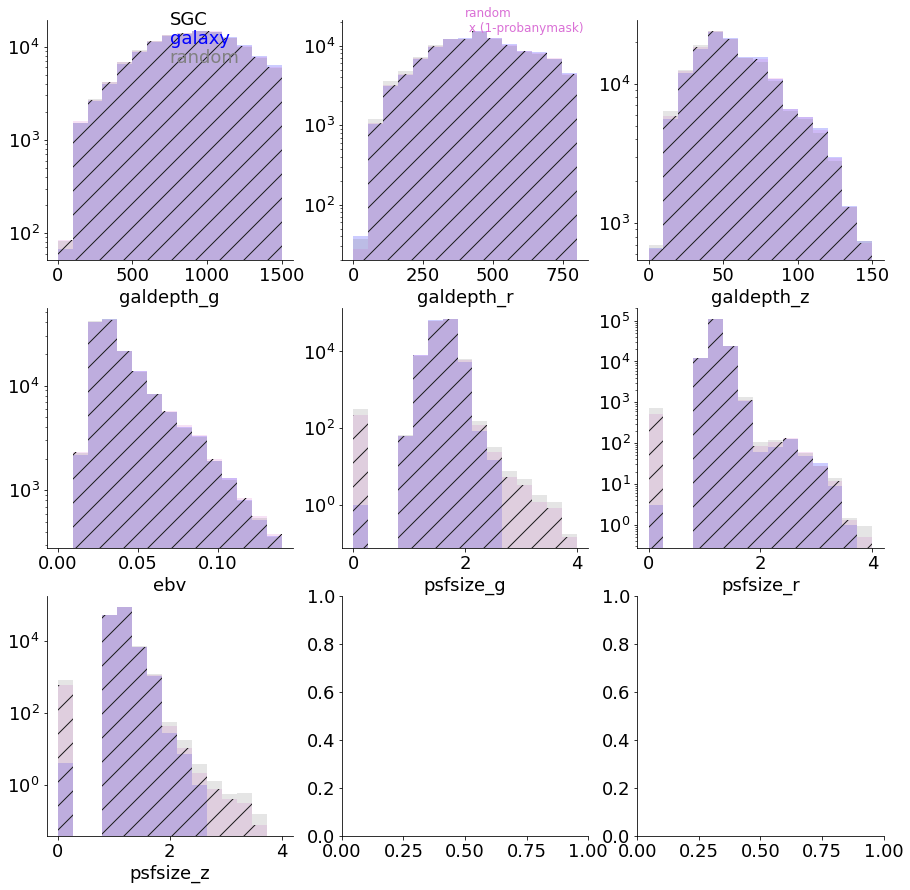

In [21]:
get_hists_w('SGC')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from glob import glob

In [4]:
%ls /Users/mehdi/analyses/eboss/ashley_cats/nnbar256/

nnbar_ebv_256_mean_NGC.npy          nnbar_probanymask_256_mean_NGC.npy
nnbar_ebv_256_mean_SGC.npy          nnbar_psfsize_g_256_mean_NGC.npy
nnbar_galdepth_g_256_mean_NGC.npy   nnbar_psfsize_g_256_mean_SGC.npy
nnbar_galdepth_g_256_mean_SGC.npy   nnbar_psfsize_r_256_mean_NGC.npy
nnbar_galdepth_r_256_mean_NGC.npy   nnbar_psfsize_r_256_mean_SGC.npy
nnbar_galdepth_r_256_mean_SGC.npy   nnbar_psfsize_z_256_mean_NGC.npy
nnbar_galdepth_z_256_mean_NGC.npy   nnbar_psfsize_z_256_mean_SGC.npy
nnbar_galdepth_z_256_mean_SGC.npy


In [6]:
ngc = glob('/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/*NGC*')
sgc = glob('/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/*SGC*')
ngc, sgc

(['/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_ebv_256_mean_NGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_galdepth_g_256_mean_NGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_galdepth_r_256_mean_NGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_galdepth_z_256_mean_NGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_psfsize_g_256_mean_NGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_psfsize_r_256_mean_NGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_psfsize_z_256_mean_NGC.npy'],
 ['/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_ebv_256_mean_SGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_galdepth_g_256_mean_SGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_galdepth_r_256_mean_SGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar256/nnbar_galdepth_z_256_mean_SGC.npy',
  '/Users/mehdi/analyses/eboss/ashley_cats/nnbar

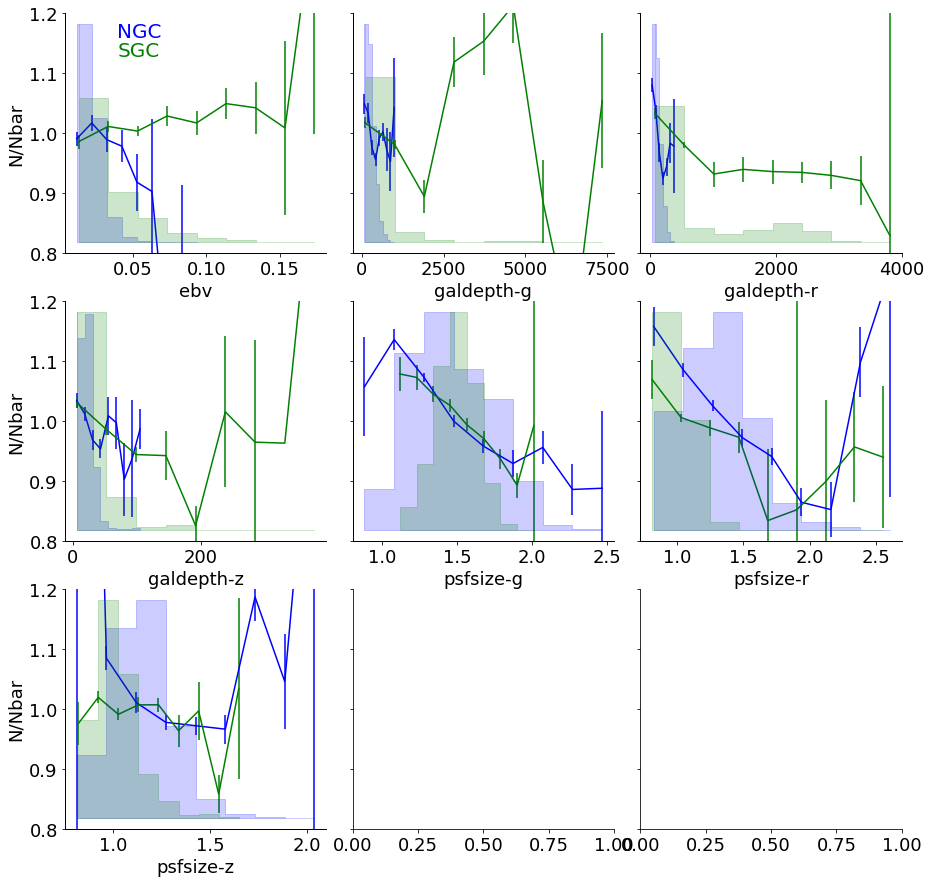

In [34]:
def addplot(ax, data, color):
    x  = data['bin_edges'][:-1]
    y  = data['delta']
    ye = data['delta_err']
    s  = data['area']
    #
    ax.errorbar(x, y, yerr=ye, c=color)
    ax2 = ax.twinx()
    ax2.fill_between(x, s, step='pre', color=color, alpha=0.2)
    ax.set_ylim(.8, 1.2)
    ax2.set_yticks([])

plt.rc('axes.spines', right=False, top=False)
plt.rc('font', size=18)
f,a = plt.subplots(ncols=3, nrows=3, figsize=(15,15),
                  sharey=True)
plt.subplots_adjust(hspace=0.2, wspace=0.1)
a   = a.flatten()
labels = ['ebv', 'galdepth-g', 'galdepth-r', 'galdepth-z',
          'psfsize-g', 'psfsize-r', 'psfsize-z']
for i in range(len(ngc)):
    ngc_i = np.load(ngc[i]).item()
    sgc_i = np.load(sgc[i]).item()
    addplot(a[i], ngc_i, 'blue')
    addplot(a[i], sgc_i, 'green')
    a[i].set_xlabel(labels[i])
    if i == 0:
        a[0].text(0.2, 0.9, 'NGC', 
                  color='blue', transform=a[0].transAxes,
                 fontsize=20)
        a[0].text(0.2, 0.82, 'SGC', 
                  color='green', transform=a[0].transAxes,
                 fontsize=20)
    #    a[0].text(0.2, 0.8, 'area', color='r',
    #              transform=a[0].transAxes)
    if i in [0,3,6]:a[i].set_ylabel('N/Nbar')

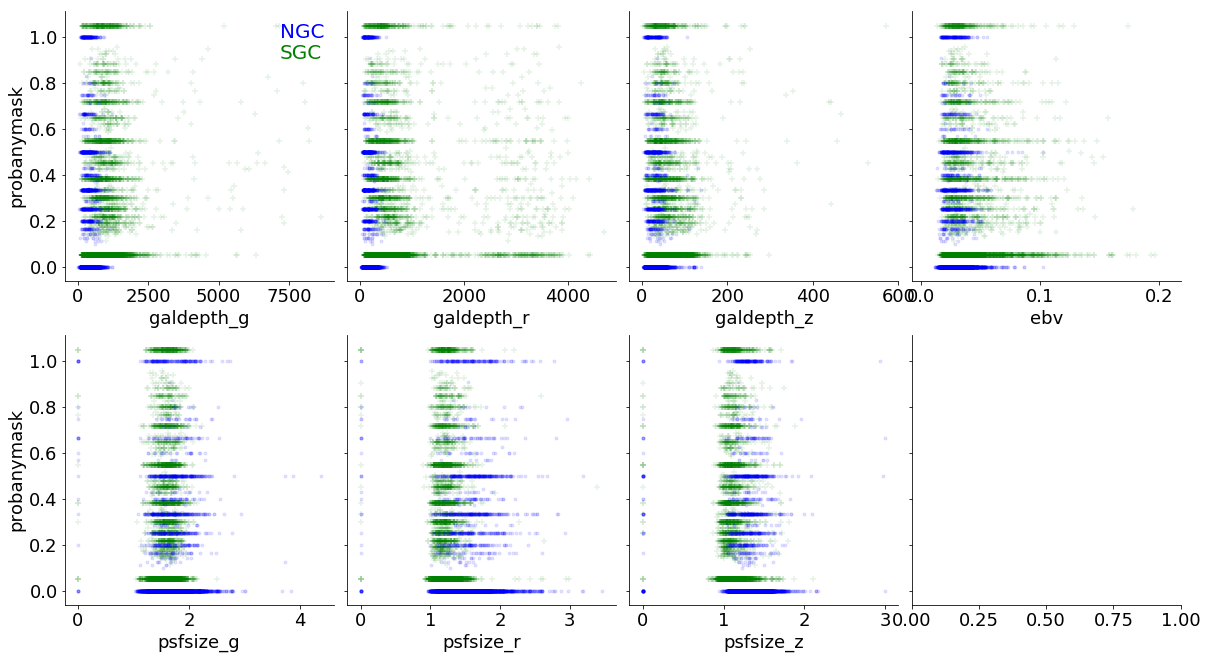

In [20]:
def scatter_probanymask():
    NGC = ft.read(path+'ELGNGCtestfull.ran.fits', lower=True)
    SGC = ft.read(path+'ELGSGCtestfull.ran.fits', lower=True)
    sysnames = ['galdepth_g','galdepth_r',
        'galdepth_z','ebv',
        'psfsize_g','psfsize_r',
         'psfsize_z']
    plt.rc('axes.spines', right=False, top=False)
    plt.rc('font', size=18)
    f,a = plt.subplots(ncols=4, nrows=2, 
                       figsize=(20,10), sharey=True)
    plt.subplots_adjust(wspace=0.05, top=0.95)
    a = a.flatten()
    indn = np.random.choice(np.arange(NGC.size), size=5000, replace=False)
    inds = np.random.choice(np.arange(SGC.size), size=5000, replace=False)
    for i,s_i in enumerate(sysnames):
        a[i].scatter(SGC[s_i][inds],0.05+SGC['probanymask'][inds],
                    alpha=0.1,marker='+', color='g')
        a[i].scatter(NGC[s_i][indn],NGC['probanymask'][indn],
                    alpha=0.1,marker='.', color='b')        
        a[i].set_xlabel(s_i)
        if i in [0,4]:a[i].set_ylabel('probanymask')
        if i == 0:
            a[0].text(0.8, 0.9, 'NGC', 
                      color='blue', transform=a[0].transAxes,
                     fontsize=20)
            a[0].text(0.8, 0.82, 'SGC', 
                      color='green', transform=a[0].transAxes,
                     fontsize=20)
scatter_probanymask()

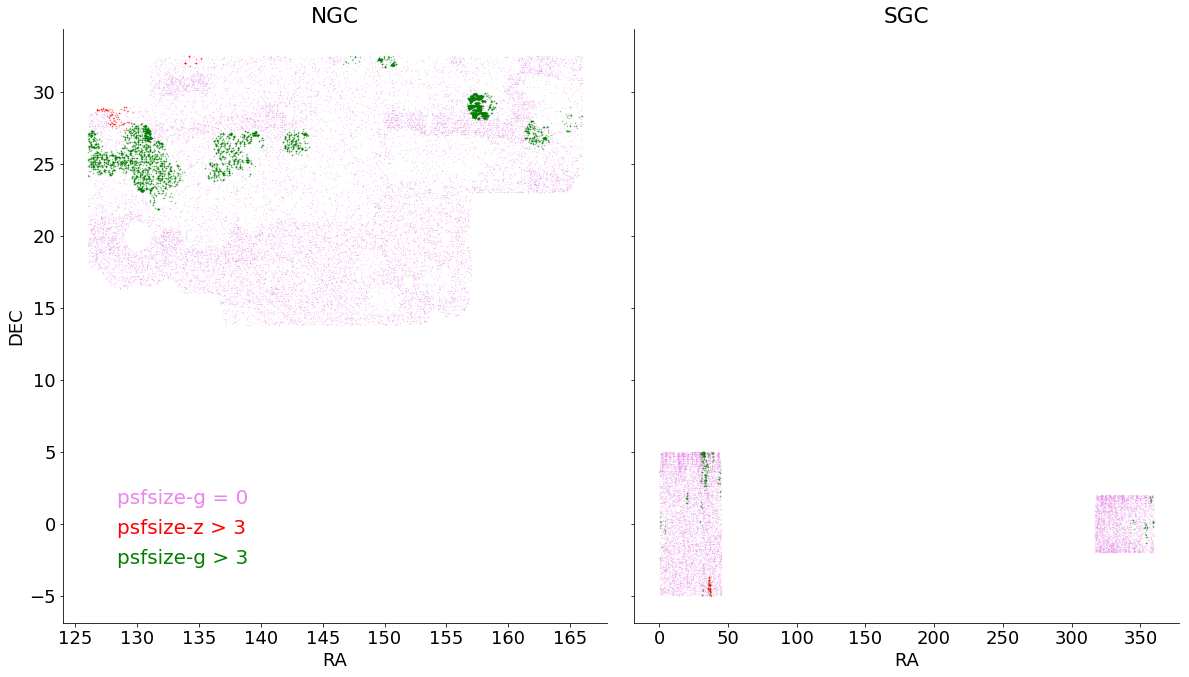

In [15]:
import fitsio as ft
def scatter_randoms():
    path = '/global/homes/m/mehdi/work/ebossv5_10_7/'
    NGC = ft.read(path+'ELGNGCtestfull.ran.fits', lower=True)
    SGC = ft.read(path+'ELGSGCtestfull.ran.fits', lower=True)
    sysnames = ['psfsize_g','psfsize_z']
    plt.rc('axes.spines', right=False, top=False)
    plt.rc('font', size=18)
    f,a = plt.subplots(ncols=2, 
                       figsize=(20,10), sharey=True)
    plt.subplots_adjust(wspace=0.05, top=0.95)
    a = a.flatten()   
    t = ['NGC','SGC']
    for i,s_i in enumerate([NGC, SGC]):
        maskg = s_i['psfsize_g'] > 3
        mask0 = s_i['psfsize_g'] == 0.
        maskz = s_i['psfsize_z'] > 3.
#         a[i].scatter(s_i['ra'], s_i['dec'], 0.1,
#                     alpha=0.5, marker='.', color='grey')        
        a[i].scatter(s_i['ra'][mask0], s_i['dec'][mask0],0.1,
                   alpha=.5, marker='.', color='violet')        
        a[i].scatter(s_i['ra'][maskg], s_i['dec'][maskg],1.,
                    alpha=.5, marker='.', color='g')

        a[i].scatter(s_i['ra'][maskz], s_i['dec'][maskz],1.,
                    alpha=.5, marker='.', color='r')
        a[i].set_xlabel('RA')
        a[i].set_title(t[i])
        if i in [0]:a[i].set_ylabel('DEC')
        if i == 0:
            a[0].text(0.1, 0.1, 'psfsize-g > 3', 
                      color='g', transform=a[0].transAxes,
                     fontsize=20)
            a[0].text(0.1, 0.15, 'psfsize-z > 3', 
                      color='r', transform=a[0].transAxes,
                     fontsize=20)
            a[0].text(0.1, 0.2, 'psfsize-g = 0', 
                     color='violet', transform=a[0].transAxes,
                    fontsize=20)
scatter_randoms()